<a href="https://colab.research.google.com/github/Komal-londhe/Customer-Churn-Prediction/blob/main/Dataset_IBMTelco_CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem

Predicting customer churn is critical for telecommunication companies to be able to effectively retain customers. It is more costly to acquire new customers than to retain existing ones. For this reason, large telecommunications corporations are seeking to develop models to predict which customers are more likely to change and take actions accordingly. In this article, we build a model to predict how likely a customer will churn by analyzing its characteristics: (1) demographic information, (2) account information, and (3) services information. The objective is to obtain a data-driven solution that will allow us to reduce churn rates and, as a consequence, to increase customer satisfaction and corporation revenue.

# Dataset Information

The data set used in this article is available in the Kaggle and contains twenty one columns (independent variables) that indicate the characteristics of the clients of a IBM telecommunications corporation. The Churn column (target variable) indicates whether the customer departed within the last month or not. The class 'No' includes the clients that did not leave the company last month, while the class 'Yes' contains the clients that decided to terminate their relations with the company. The objective of the analysis is to obtain the relation between the customer’s characteristics and the churn.


https://www.kaggle.com/blastchar/telco-customer-churn

The data set available in Kaggle is of IBM data.

https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113


# CRISP - DM Methodology

- 1. Data Loading
- 2. Data Cleaning
- 3. Exploratory Data Analysis using Data Visualization
- 4. Data Preprocessing
- 5. Model Selection
- 6. Model Improvement
- 7. Model Evaluation
- 8. Future Predictions
- 9. Model Deployment

# 1. Data Loading

Importing Required libraries

In [ ]:
#Standard libraries for data analysis:   
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sns
import math
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import plotly.express as px
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Loading data into dataframe using read_csv()
dataset1 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
# view the data using head() - by default displys first 5 rows of data
dataset1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check concise summary of the dataframe
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Check column names 
dataset1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

As shown above, the data set contains **20 independent variables (17 Categorical & 3 Continuous)**, which can be classified into 3 groups:

**(1) Demographic Information**

gender: Whether the client is a female or a male (Female, Male).

SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1). 

Partner: Whether the client has a partner or not (Yes, No). 

Dependents: Whether the client has dependents or not (Yes, No).

**(2) Customer Account Information**

tenure: Number of months the customer has stayed with the company (Multiple different numeric values). 

Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year). 

PaperlessBilling: Whether the client has paperless billing or not (Yes, No) 

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)). 

MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values). 

TotalCharges: The total amount charged to the customer (Multiple different numeric values).

**(3) Services Information**

PhoneService: Whether the client has a phone service or not (Yes, No). 

MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes). 

InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No) 

OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes). 

OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes). 

DeviceProtection: Whether the client has device protection or not (No internet service, No, Yes). 

TechSupport: Whether the client has tech support or not (No internet service, No, Yes).

StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes). 

StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes).

# 2. Data Cleaning

In [ ]:
# Printing the number of rows & columns
print("Total number of rows in dataset1 = ",dataset1.shape[0], "  , Total number of columns in dataset1 = ", dataset1.shape[1])
 
# Grouping the dataset to check for null values
dataset1.columns.to_series().groupby(dataset1.dtypes).groups

# Display True if there are null values else display false in front of column names
dataset1.isna().any()

Total number of rows in dataset1 =  7043   , Total number of columns in dataset1 =  21


customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

There are no missing values in the dataset

In [ ]:
#Unique values in each categorical variable:
print("Number of unique values in Payment method of dataset1 : ", dataset1["PaymentMethod"].nunique())
print("Different payment methods : \n", dataset1["PaymentMethod"].unique())
print("\nNumber of unique values in Contract of dataset1 : ", dataset1["Contract"].nunique())
print("Different contract types : \n", dataset1["Contract"].unique())

Number of unique values in Payment method of dataset1 :  4
Different payment methods : 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Number of unique values in Contract of dataset1 :  3
Different contract types : 
 ['Month-to-month' 'One year' 'Two year']


In [ ]:
# remove (automatic) from payment method names
dataset1['PaymentMethod'] = dataset1['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

# unique elements of the PaymentMethod column after the modification 
dataset1.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

As shown above, the data set contains 7043 observations and 21 columns. Apparently, there are no null values on the data set; however, we observe that the column 'TotalCharges' was wrongly detected as an object. This column represents the total amount charged to the customer and it is, therefore, a numeric variable. For further analysis, we need to transform this column into a numeric data type. To do so, we can use the pd.to_numeric function. By default, this function raises an exception when it sees non-numeric data; however, we can use the argument errors='coerce' to skip those cases

In [ ]:
dataset1['TotalCharges'] = pd.to_numeric(dataset1['TotalCharges'],errors='coerce')
dataset1['TotalCharges'] = dataset1['TotalCharges'].astype("float")

# 3. Exploratory Data Analysis using Data Visualization

**1. Visualizing all column data**

In [ ]:
# Distribution graphs (histogram/bar graph) of column data 
# Function to visualize columns
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

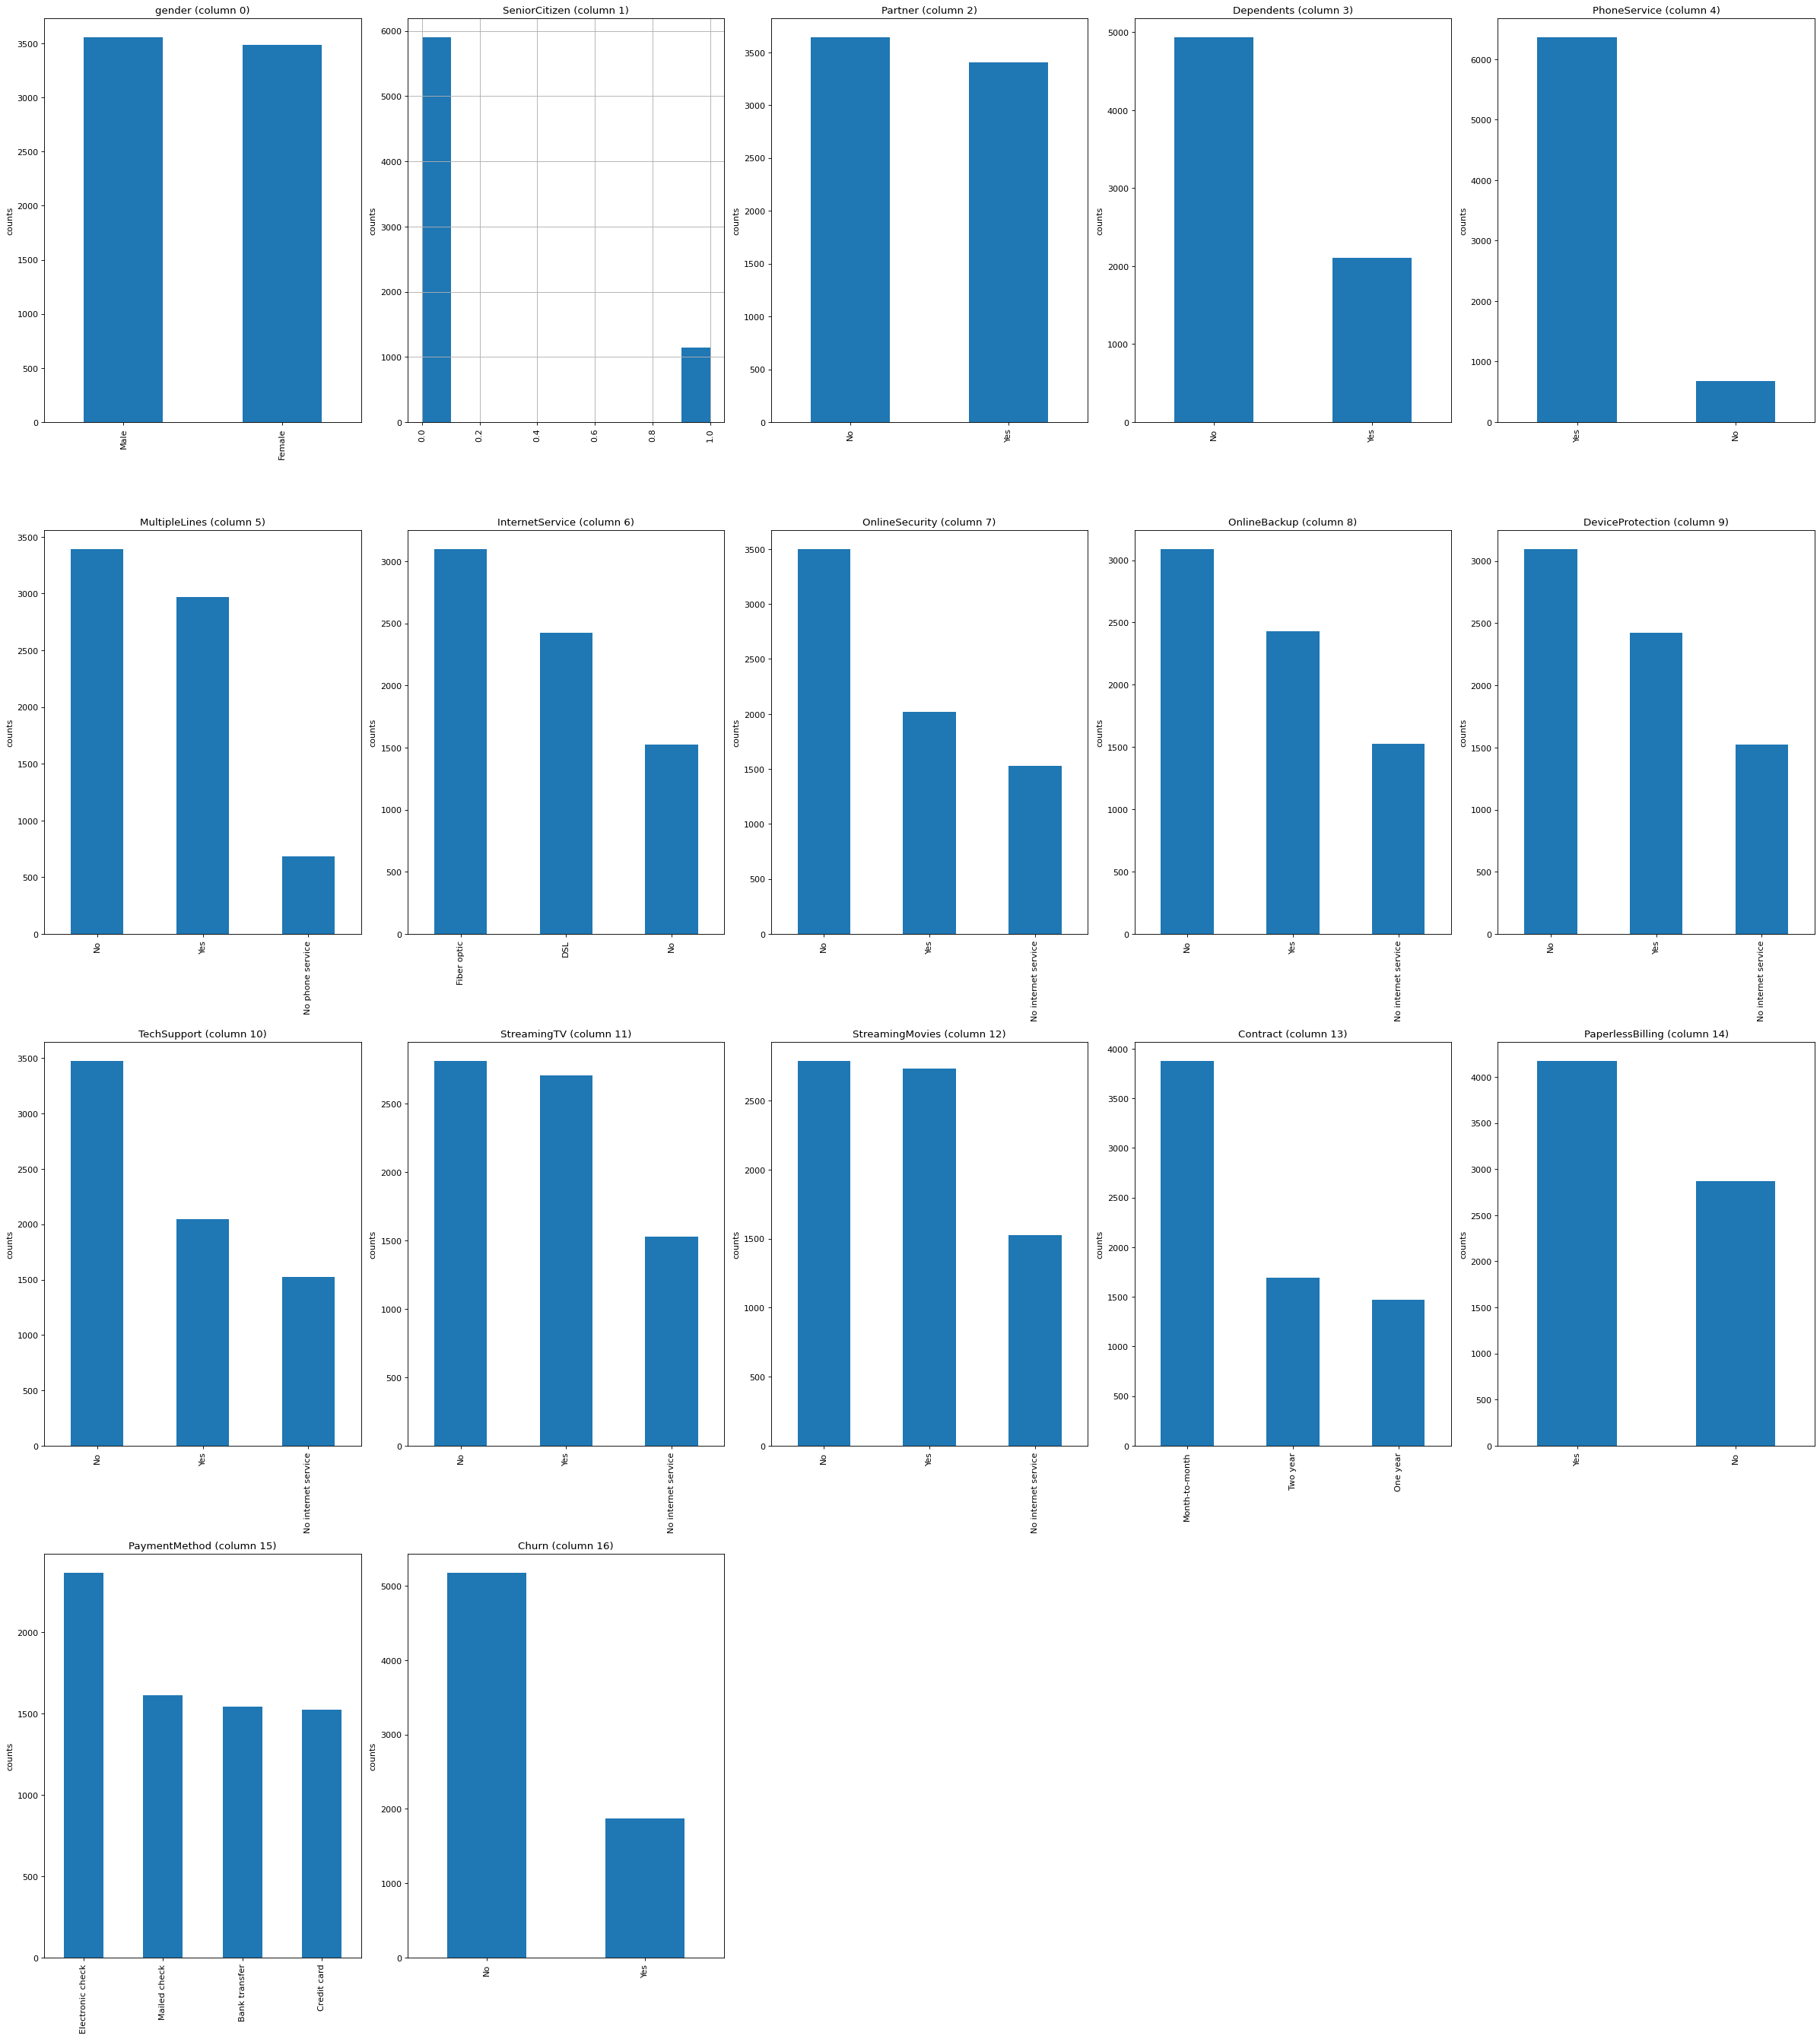

In [ ]:
plotPerColumnDistribution(dataset1, 21, 5)

**Target Variable**

The following pie chart shows the percentage of observations that correspond to each class of the target variable: 'No' and 'Yes'. As shown below, this is an imbalanced data set because both classes are not equally distributed among all observations, being 'No' the majority class (73.5%).

In [ ]:
print("Number of rows with Churn as Yes/No \n", dataset1["Churn"].value_counts())
churn=dataset1['Churn'].value_counts()
fig = px.pie(dataset1, values=churn.values, names=['No','Yes'],color_discrete_sequence=px.colors.sequential.RdBu,
            title='Churn Breakdown')
fig.show()

Number of rows with Churn as Yes/No 
 No     5174
Yes    1869
Name: Churn, dtype: int64


**2. Visualizing data with respect to target variable 'Churn'**

In [ ]:
def percentage_stacked_plot(columns_to_plot, super_title):    
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(dataset1[column], dataset1['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['indianred','maroon'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True, labels = ['No','Yes'])

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

In [ ]:
def percentage_stacked_plot2(columns_to_plot, super_title):    

    number_of_columns = 3
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=20,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(dataset1[column], dataset1['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['indianred','maroon'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True, labels = ['No','Yes'])

        # set title and labels
        ax.set_title('Observations by ' + column,
                     fontsize=10, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

***Demographic Information***

The following code creates a stacked percentage bar chart for each demographic attribute (gender, SeniorCitizen, Partner, Dependents), showing the percentage of Churn for each category of the attribute.

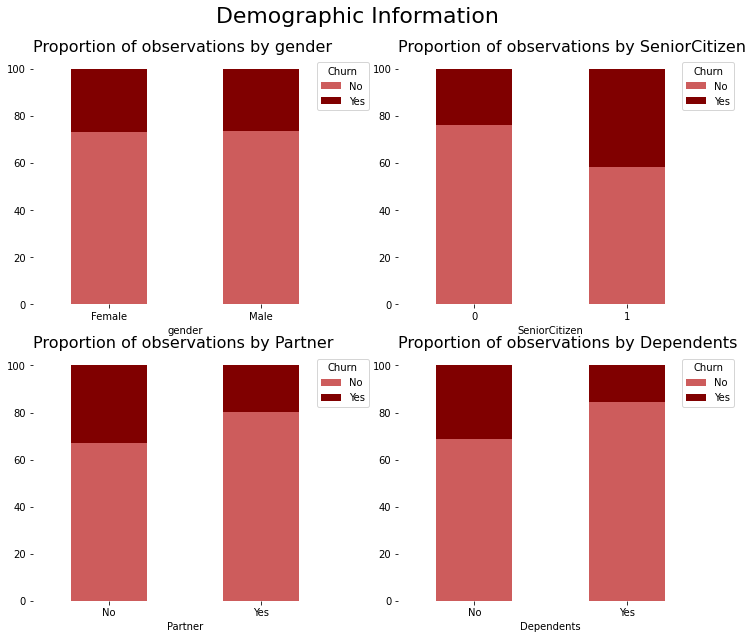

In [ ]:
# demographic column names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

As shown above, each bar is a category of the independent variable, and it is subdivided to show the proportion of each target class (No and Yes).

We can extract the following conclusions by analyzing demographic attributes:

- The churn rate of senior citizens is almost double that of young citizens.

- We do not expect gender to have significant predictive power. A similar percentage of churn is shown both when a customer is a man or a woman.

- Customers with a partner churn less than customers with no partner.


***Customer Account Information — Categorical variables***

As we did with demographic attributes, we evaluate the percentage of Churn for each category of the customer account attributes (Contract, PaperlessBilling, PaymentMethod).

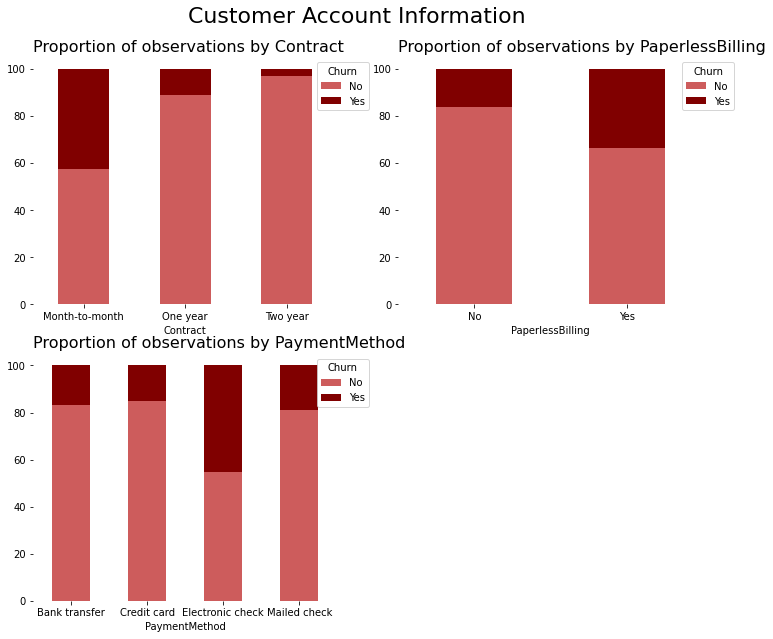

In [ ]:
# customer account column names
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')

We can extract the following conclusions by analyzing customer account attributes:

- Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.

- Customers who opted for an electronic check as paying method are more likely to leave the company.

- Customers subscribed to paperless billing churn more than those who are not subscribed.

***Customer Account Information — Numerical variables***

The following plots show the distribution of tenure, MontlyCharges, TotalCharges by Churn. For all numeric attributes, the distributions of both classes (No and Yes) are different which suggests that all of the attributes will be useful to determine whether or not a customer churns.

In [ ]:
train_num_visual_0 = ['MonthlyCharges', 'tenure','TotalCharges']

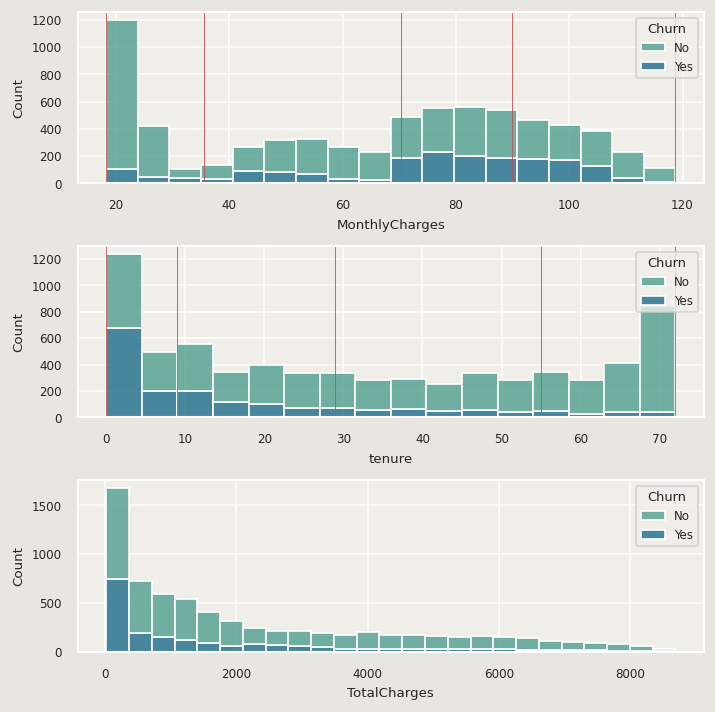

In [ ]:
sns.set_theme(rc = {'figure.dpi': 120, 'axes.labelsize': 8, 
                    'axes.facecolor': '#f0eee9', 'grid.color': '#fffdfa', 
                    'figure.facecolor': '#e8e6e1'}, font_scale = 0.65)

fig, ax = plt.subplots(3, 1, figsize = (6, 6))

for indx, (column, axes) in list(enumerate(list(zip(train_num_visual_0, ax.flatten())))):
    
    sns.histplot(ax = axes, x = dataset1[column], hue = dataset1['Churn'], 
                 palette = 'crest', alpha = 0.8, multiple = 'stack')
    
    legend = axes.get_legend() # sns.hisplot has some issues with legend
    handles = legend.legendHandles
    legend.remove()
    axes.legend(handles, ['No', 'Yes'], title = 'Churn', loc = 'upper right')
    Quantiles = np.quantile(dataset1[column], [0, 0.25, 0.50, 0.75, 1])
    
    for q in Quantiles: axes.axvline(x = q, linewidth = 0.5, color = 'r')
        
plt.tight_layout()
plt.show()

We can extract the following conclusions by analyzing the histograms above:

- The churn rate tends to be larger when monthly charges are high.

- New customers (low tenure) are more likely to churn.

- Clients with high total charges are less likely to leave the company.

***Services Information***

Lastly, we evaluate the percentage of the target for each category of the services columns with stacked bar plots.

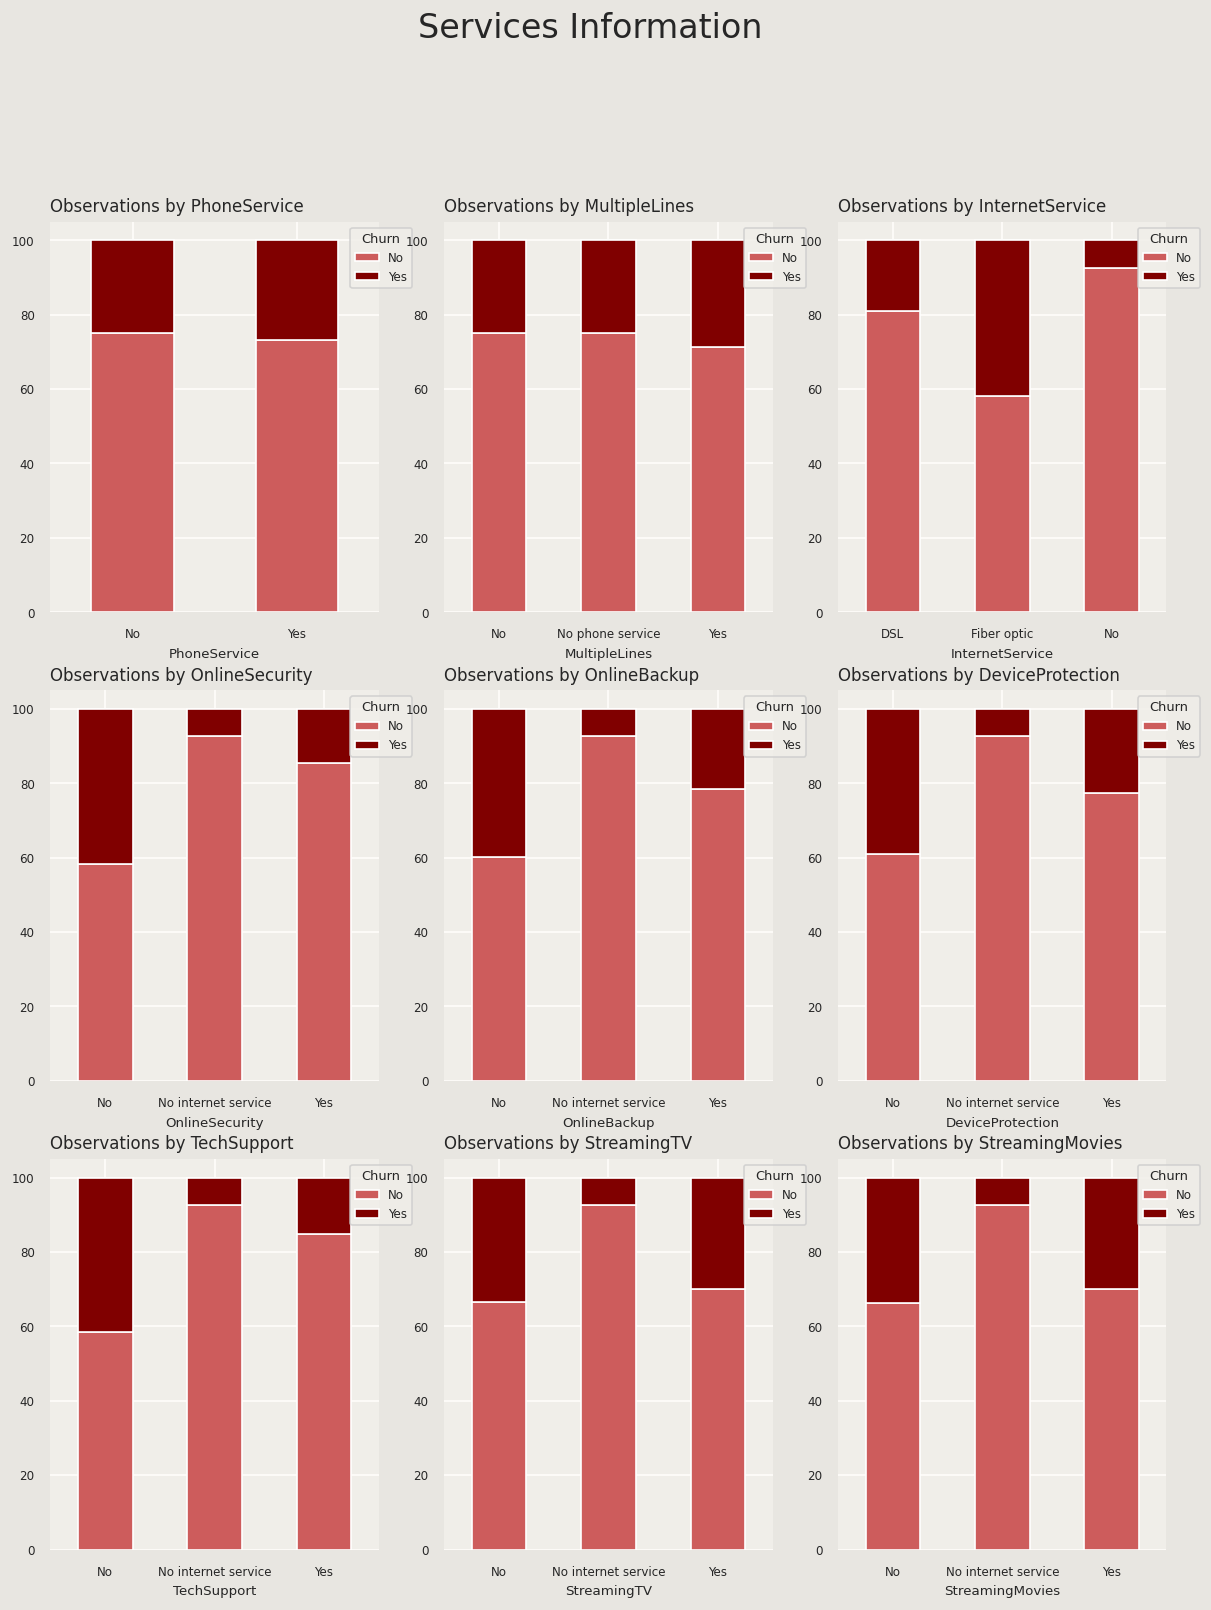

In [ ]:
# services column names
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# stacked plot of services columns
percentage_stacked_plot2(services_columns, 'Services Information')

We can extract the following conclusions by evaluating services attributes:

- We do not expect phone attributes (PhoneService and MultipleLines) to have significant predictive power.

- The percentage of churn for all classes in both independent variables is nearly the same.

- Clients with online security churn less than those without it.

- Customers with no tech support tend to churn more often than those with tech support.

By looking at the plots above, we can identify the most relevant attributes for detecting churn. We expect these attributes to be discriminative in our future models.

**Label Encode Binary data:**

Machine Learning algorithms can typically only have numerical values as their independent variables. Hence label encoding is quite pivotal as they encode categorical labels with appropriate numerical values. Here we are label encoding all categorical variables that have only two unique values.

In [ ]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dataset1.columns[1:]:
    if dataset1[col].dtype == 'object':
        if len(list(dataset1[col].unique())) <= 2:
            le.fit(dataset1[col])
            dataset1[col] = le.transform(dataset1[col])
            le_count += 1
            print(col)
print('{} columns were label encoded.'.format(le_count))

gender
Partner
Dependents
PhoneService
PaperlessBilling
Churn
6 columns were label encoded.


**Check Multicollinearity using VIF:**

Let's try to look into multicollinearity using Variable Inflation Factors (VIF). VIF determines the strength of the correlation of a variable with a group of other independent variables in a dataset. VIF starts usually at 1 and anywhere exceeding 10 indicates high multicollinearity between the independent variables.

In [ ]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])]
    return(vif)

dataset1 = dataset1[~dataset1.isin([np.nan, np.inf, -np.inf]).any(1)]
dataset_vif = dataset1[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService','PaperlessBilling','MonthlyCharges','TotalCharges']]
calc_vif(dataset_vif)

,variables,VIF
0,gender,1.922523
1,SeniorCitizen,1.327942
2,Partner,2.813694
3,Dependents,1.919266
4,tenure,10.727299
5,PhoneService,8.030292
6,PaperlessBilling,2.816921
7,MonthlyCharges,14.109313
8,TotalCharges,12.740486


We can see here that the ‘Monthly Charges’ and ‘Total Charges’ have a high VIF value.

**Correlation matrix**

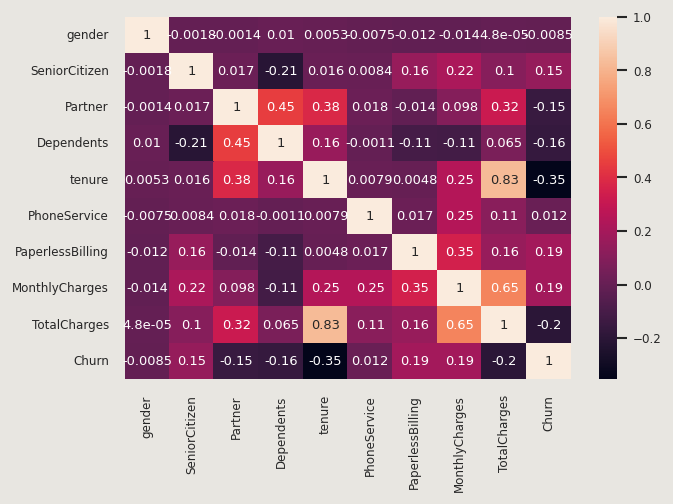

In [ ]:
corrMatrix = dataset1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Text(0, 0.5, 'Total Charges')

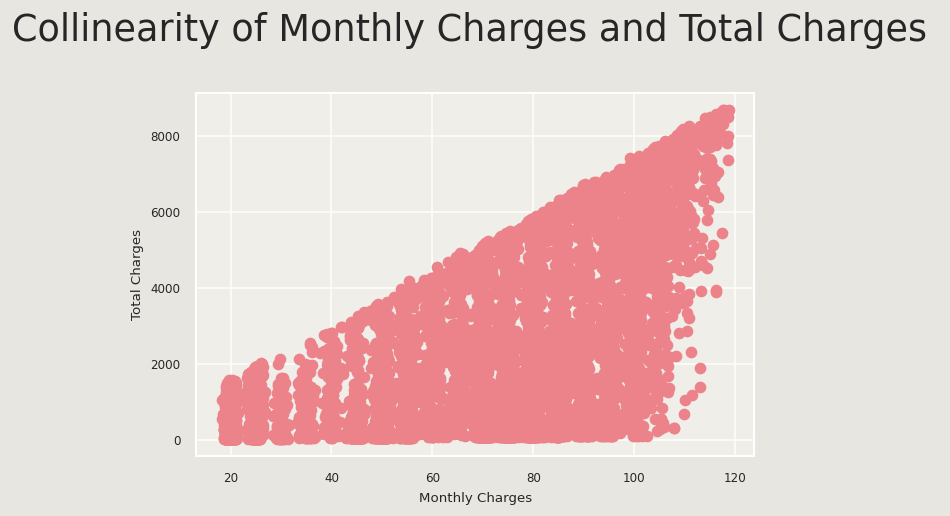

In [ ]:
# 'Total Charges' seem to be collinear with 'Monthly Charges'.
# Check colinearity:
x = dataset1['MonthlyCharges']
y = dataset1['TotalCharges']
plt.scatter(x, y, color =  '#ec838a')
plt.title('Collinearity of Monthly Charges and Total Charges \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')

**Positive and negative correlation**

In [ ]:
dataset_cor = dataset1[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]
correlations = dataset_cor.corrwith(dataset1.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PhoneService        0.011691
dtype: float64

Most Negative Correlations: 
 Partner        -0.149982
Dependents     -0.163128
TotalCharges   -0.199484
tenure         -0.354049
dtype: float64


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

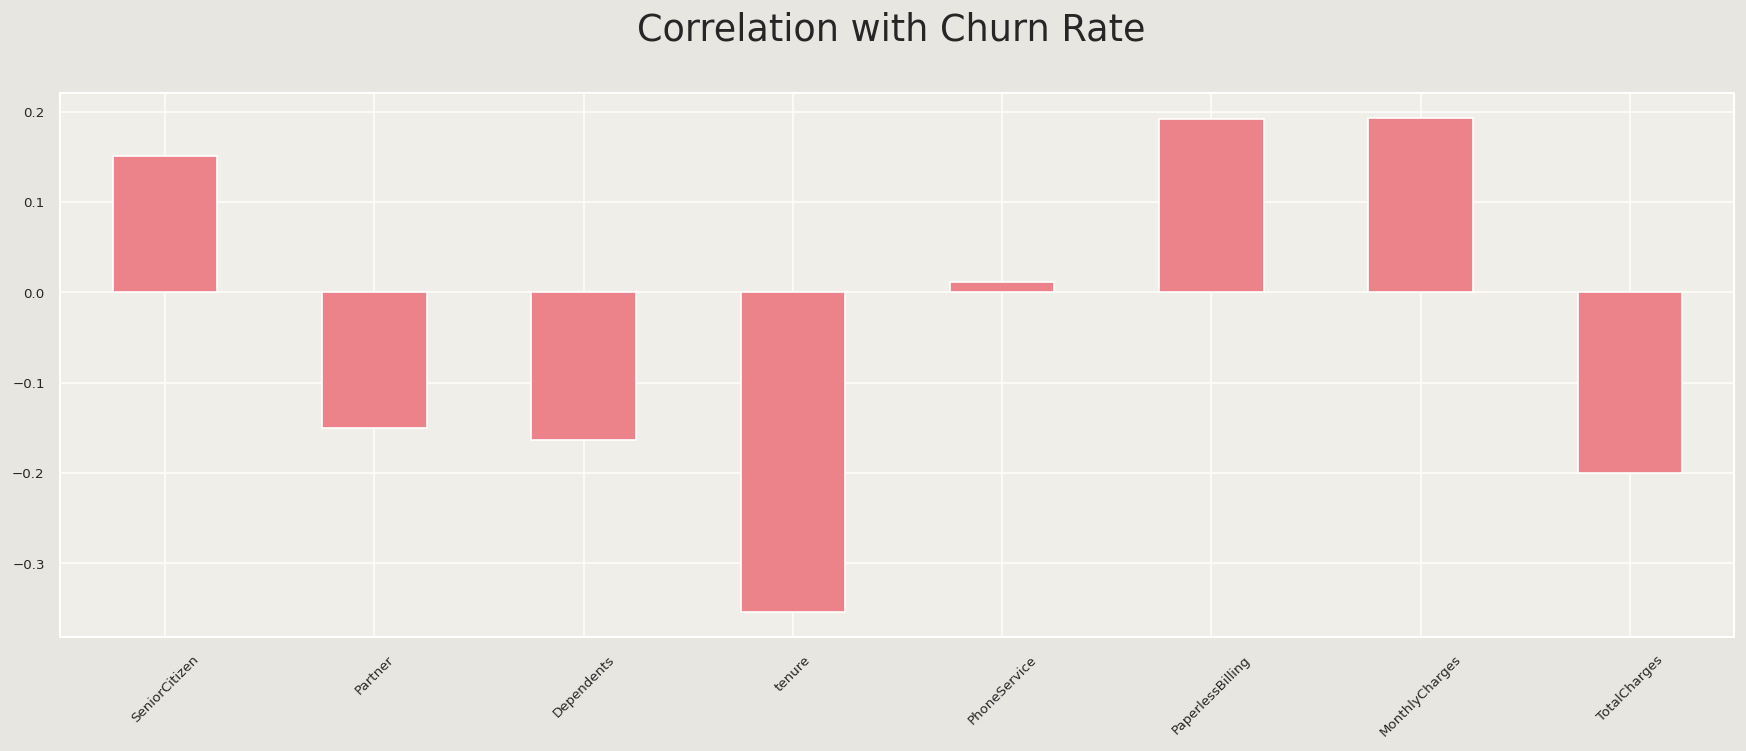

In [ ]:
correlations = dataset_cor.corrwith(dataset1.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 6), 
        fontsize = 8, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

Interestingly, the churn rate increases with monthly charges and age. In contrast Partner, Dependents and Tenure seem to be negatively related to churn.

The churn rate increases with monthly charges, age and paperless billing. In contrast Partner, Dependents, Tenure and Total Charges seem to be negatively related to churn.


Let’s try to drop one of the correlated features to see if it help us in bringing down the multicollinearity between correlated features:

In [ ]:
#Dropping 'TotalCharges':
    
dataset_new = dataset_vif.drop(columns = "TotalCharges")
#Revalidate Colinearity:
dataset_new = dataset1[['gender', 
'SeniorCitizen', 'Partner', 'Dependents',
'tenure', 'PhoneService', 'PaperlessBilling',
'MonthlyCharges']]
calc_vif(dataset_new)

,variables,VIF
0,gender,1.878863
1,SeniorCitizen,1.323160
2,Partner,2.812757
3,Dependents,1.904657
4,tenure,3.299933
5,PhoneService,5.967552
6,PaperlessBilling,2.748477
7,MonthlyCharges,7.465415


In our example, after dropping the ‘Total Charges’ variable, VIF values for all the independent variables have decreased to a considerable extent.

In [ ]:
#Applying changes in the main dataset: 
dataset1 = dataset1.drop(columns = "TotalCharges")

In [ ]:
dataset1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

Exploratory Data Analysis Concluding Remarks:

Let’s try to summarise some of the key findings from this EDA:

- The dataset does not have any missing or erroneous data values.

- Strongest positive correlation with the target features is Monthly Charges and Age whilst negative correlation is with Partner, Dependents and Tenure.

- The dataset is imbalanced with the majority of customers being active.

- There is multicollinearity between Monthly Charges and Total Charges.

- Dropping Total Charges have decreased the VIF values considerably.

- Most of the customers in the dataset are younger people.

- There are a lot of new customers in the organization (less than 10 months old) followed by a loyal customer base that’s above 70 months old.

- Customers with a month-to-month connection have a very high probability to churn that too if they have subscribed to pay via electronic checks.

# 4. Data Preprocessing

**Encode Categorical data**:

Any categorical variable that has more than two unique values have been dealt with Label Encoding and one-hot Encoding using get_dummies method in pandas here.

In [ ]:
#Incase if user_id is an object:
    
identity = dataset1["customerID"]
dataset1 = dataset1.drop(columns="customerID")
#Convert rest of categorical variable into dummy:
dataset1= pd.get_dummies(dataset1)
#Rejoin userid to dataset:
dataset1 = pd.concat([dataset1, identity], axis = 1)

**Split the dataset into dependent and independent variables:**

Now we need to separate the dataset into X and y values. y would be the ‘Churn’ column whilst X would be the remaining list of independent variables in the dataset.

In [ ]:
#Identify target variable:
    
target = dataset1["Churn"]
dataset1 = dataset1.drop(columns="Churn")

Generate training and test datasets: Let’s decouple the master dataset into training and test set with an 80%-20% ratio.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset1, target,stratify=target, test_size = 0.2, random_state = 0)
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5625, 40)
Number transactions y_train dataset:  (5625,)
Number transactions X_test dataset:  (1407, 40)
Number transactions y_test dataset:  (1407,)


In [ ]:
# Remove Identifiers: Separate ‘customerID’ from training and test data frames.
train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])
test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])

**Conduct Feature Scaling**:

It’s quite important to normalize the variables before conducting any machine learning (classification) algorithms so that all the training and test variables are scaled within a range of 0 to 1.

In [ ]:
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

# 5. Model Selection

The modelling approach used for the project is - **Classification (Binary Classification)**

Binary Classification is classification predictive modelling where tasks have only two labels. (Here, churn prediction –churn or not).

From different classifiers like Logistic Regression, Linear SVM, Random forest, Decision Tree will find the optimal model of choice.


**Compare Baseline Classification Algorithms (1st Iteration):**

Let’s model each classification algorithm over the training dataset and evaluate their accuracy and standard deviation scores. Classification Accuracy is one of the most common classification evaluation metrics to compare baseline algorithms as its the number of correct predictions made as a ratio of total predictions. However, it's not the ideal metric when we have class imbalance issue. Hence, let us sort the results based on the ‘Mean AUC’ value which is nothing but the model’s ability to discriminate between positive and negative classes.

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))

In [ ]:
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0

# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score( model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score( model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

In [ ]:
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.05,1.37,74.81,1.77
1,SVC,83.56,1.38,79.88,1.76
4,Gaussian NB,81.64,1.58,69.33,1.37
6,Random Forest,81.64,1.68,78.56,1.53
2,Kernel SVM,79.61,1.74,79.57,1.90
3,KNN,76.58,1.64,75.02,1.57
5,Decision Tree Classifier,65.56,1.99,72.92,2.07


Lets Visualize Classification Algorithms Accuracy Comparisons using Accuracy Mean

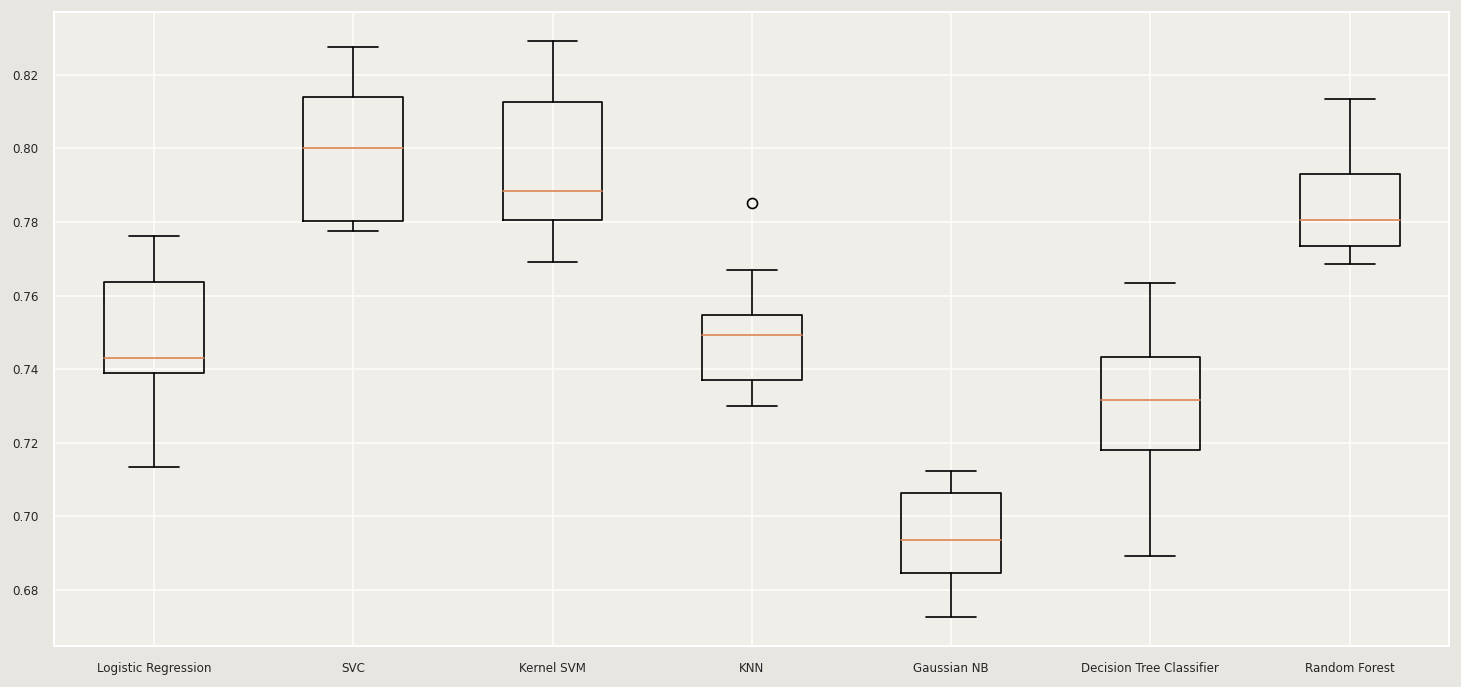

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

Lets Visualize Classification Algorithms Accuracy Comparisons using AUC Mean

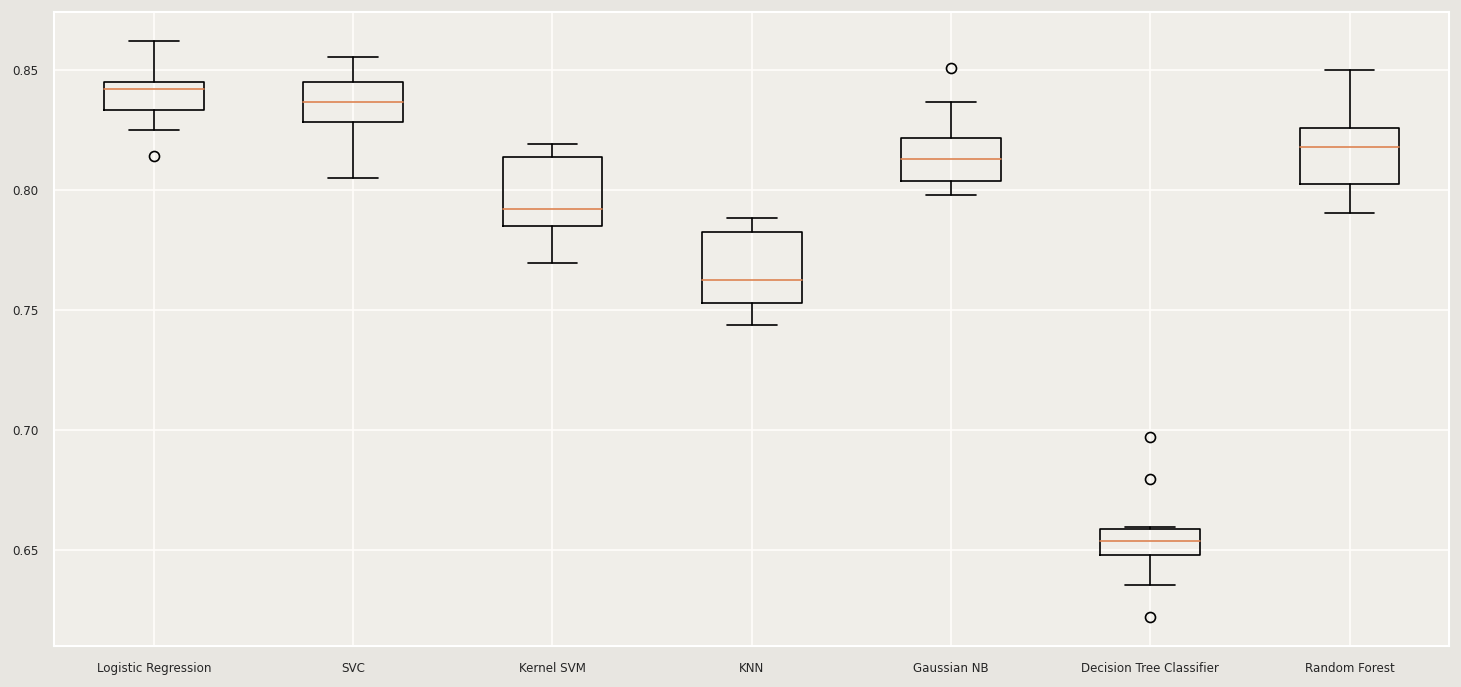

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

From the first iteration of baseline classification algorithms, we can see that Logistic Regression and SVC have outperformed the other five models for the chosen dataset with the highest mean AUC Scores. Let’s reconfirm our results in the second iteration as shown in the next steps

Get the right parameters for the baseline models: Before doing the second iteration, let’s optimize the parameters and finalize the evaluation metrics for model selection.

Identify the optimal number of K neighbors for KNN Model: In the first iteration, we assumed that K = 3, but in reality, we don’t know what is the optimal K value that gives maximum accuracy for the chosen training dataset. Therefore, let us write a for loop that iterates 20 to 30 times and gives the accuracy at each iteration so as to figure out the optimal number of K neighbors for the KNN Model.

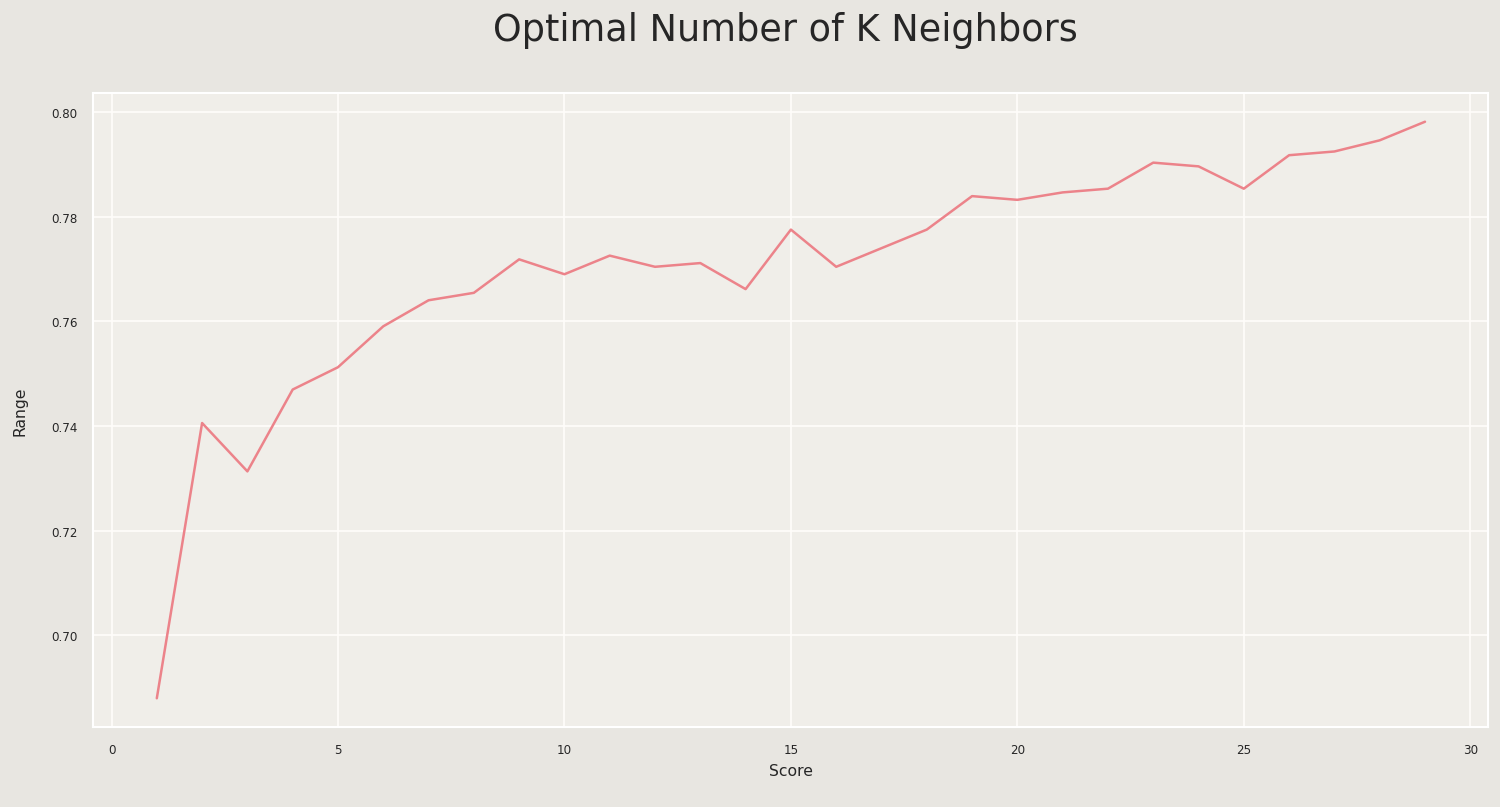

In [ ]:
score_array = []
for each in range(1,30):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
#set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,30),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',
horizontalalignment="center", fontstyle = "normal",
 fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

As we can see from the above iterations, if we use K = 29, then we will get the maximum score of approximately 80%.

Identify the optimal number of trees for Random Forest Model:

Quite similar to the iterations in the KNN model, here we are trying to find the optimal number of decision trees to compose the best random forest.

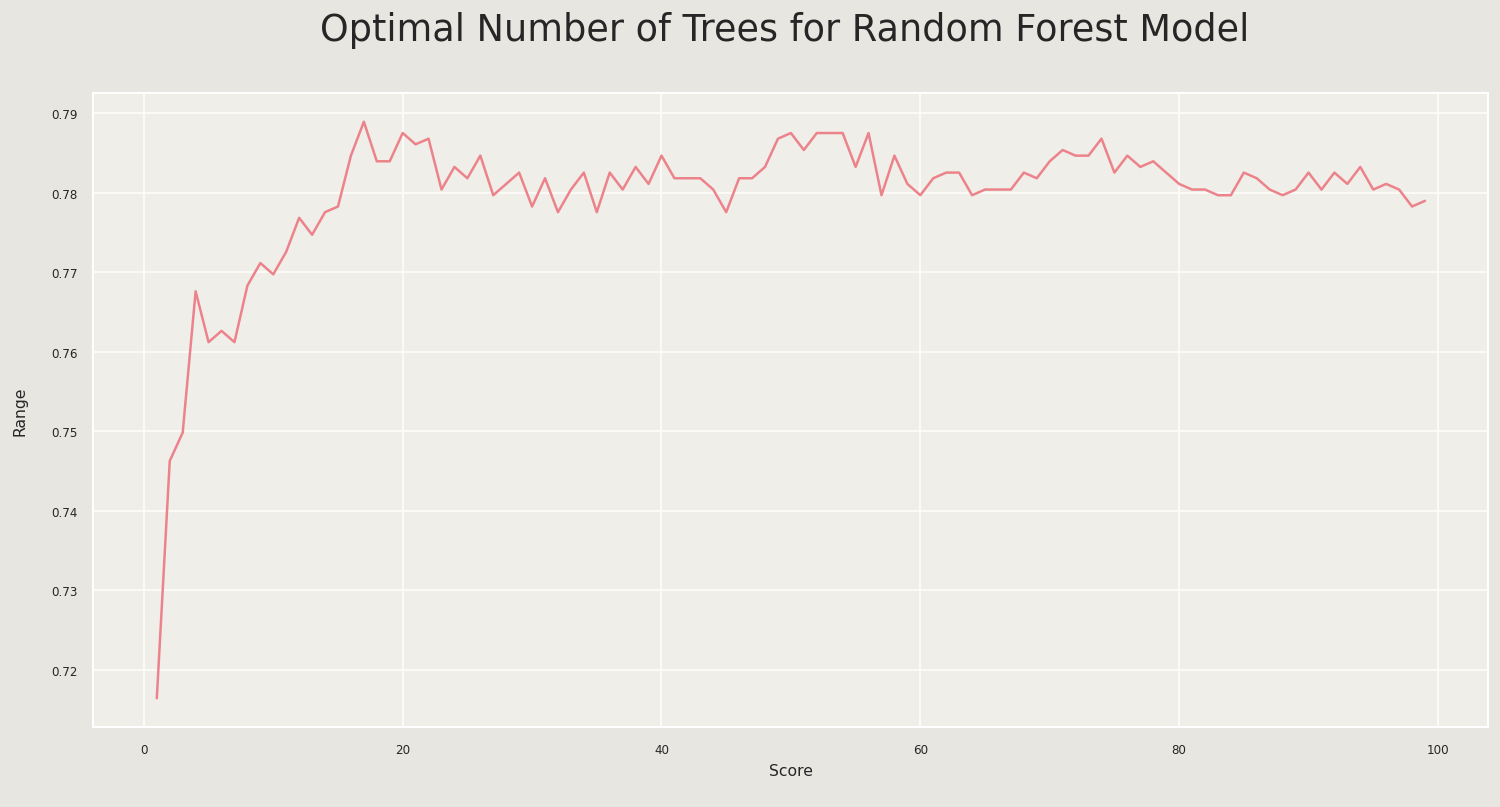

In [ ]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

As we could see from the iterations above, the random forest model would attain the highest accuracy score when its n_estimators = 72.

**Compare Baseline Classification Algorithms (2nd Iteration):**

In the second iteration of comparing baseline classification algorithms, we would be using the optimised parameters for KNN and Random Forest models. Also, we know that false negatives are more costly than false positives in a churn and hence let’s use precision, recall and f2 score as the ideal metric for the model selection.

In [ ]:
classifiers = []
classifiers.append(('Logistic Regression', LogisticRegression(random_state = 0)))
classifiers.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
classifiers.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
classifiers.append(('KNN', KNeighborsClassifier(n_neighbors = 29, metric = 'minkowski', p = 2)))
classifiers.append(('Gaussian NB', GaussianNB()))
classifiers.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
classifiers.append(('Random Forest', RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state = 0)))

In [ ]:
#Evaluating Model Results:
accuracy = []
precision = []
recall = []
f2_score = []
names = []

# set table to table to populate with performance results
col = ['Classifier', 'Accuracy', 'Precision', 'Recall', 'F2 Score']
classifier_results = pd.DataFrame(columns=col)
i = 0

# Evaluate each model:
for name, classifier in classifiers:

    # Fitting Logistic Regression to the Training set
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)

    #Evaluate results
    acc = accuracy_score(y_test, y_pred )
    prec = precision_score(y_test, y_pred )
    rec = recall_score(y_test, y_pred )
    f2 = fbeta_score(y_test, y_pred, beta=2.0)


    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    f2_score.append(f2)
    names.append(name)

    classifier_results.loc[i] = [name,
                         round(acc*100, 2),
                         round(prec*100, 2),
                         round(rec*100, 2),
                         round(f2*100, 2)
                         ]
    i += 1


In [ ]:
classifier_results = classifier_results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print(classifier_results)

                 Classifier  Accuracy  Precision  Recall  F2 Score
0       Logistic Regression     81.38      68.79   54.81     57.13
2                Kernel SVM     80.31      68.73   47.59     50.71
1                       SVC     81.17      67.64   55.88     57.89
6             Random Forest     78.54      63.14   46.26     48.87
3                       KNN     79.82      62.78   59.09     59.79
5  Decision Tree Classifier     73.70      50.54   50.27     50.32
4               Gaussian NB     69.72      46.17   83.69     71.99


From the 2nd iteration, we can definitely conclude that **logistic regression is an optimal model of choice for the given dataset** as it has relatively the highest combination of precision, recall and F2 scores; giving most number of correct positive predictions while minimizing the false negatives. Hence, let's try to use Logistic Regression and evaluate its performance in the forthcoming sections.

# 6. Model Improvement

Model improvement basically involves choosing the best parameters for the machine learning model that we have come up with. There are two types of parameters in any machine learning model — the first type are the kind of parameters that the model learns; the optimal values automatically found by running the model. The second type of parameters is the ones that user get to choose while running the model. Such parameters are called the hyperparameters; a set of configurable values external to a model that cannot be determined by the data, and that we are trying to optimize through Parameter Tuning techniques like Random Search or Grid Search.

Hyperparameter tuning might not improve the model every time. For instance, when we tried to tune the model further, we ended up getting an accuracy score less than the default model. I’m just demonstrating the steps involved in hyperparameter tuning here for future references.

In [ ]:
# Grid search cross validation

grid={"C":np.logspace(-3,3,7), "penalty":["l2"]} # l1 lasso 
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10, error_score='raise')
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",round(logreg_cv.best_score_*100,2))

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 80.09


We will take our default model as it gave better accuracy score

# 7. Model Evaluation

Train & evaluate Chosen Model: Let’s fit the selected model (Logistic Regression in this case) on the training dataset and evaluate the results.

In [ ]:
classifier = LogisticRegression(random_state = 0,penalty = 'l2')
classifier.fit(X_train, y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test)

#probability score
y_pred_probs = classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression',round(acc*100,2), round(prec*100,2), round(rec*100,2), round(f2*100,2)]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F2 Score'])
print (results)

                 Model  Accuracy  Precision  Recall  F2 Score
0  Logistic Regression     81.38      68.79   54.81     57.13


**k-Fold Cross-Validation**: Model evaluation is most commonly done through ‘K- fold Cross-Validation’ technique that primarily helps us to fix the variance. Variance problem occurs when we get good accuracy while running the model on a training set and a test set but then the accuracy looks different when the model is run on another test set. So, in order to fix the variance problem, k-fold cross-validation basically split the training set into 10 folds and train the model on 9 folds (9 subsets of the training dataset) before testing it on the test fold. This gives us the flexibility to train our model on all ten combinations of 9 folds; giving ample room to finalize the variance.

In [ ]:
accuracies = cross_val_score(estimator = classifier,X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Classifier Accuracy: 0.80 (+/- 0.03)


Therefore, our k-fold Cross Validation results indicate that we would have an accuracy anywhere between 77% to 83% while running this model on any test set.

# 8. Future Predictions

**Visualize results on a Confusion Matrix:**

[[940  93]
 [169 205]]
Test Data Accuracy: 81.3800




<Figure size 3360x2400 with 0 Axes>

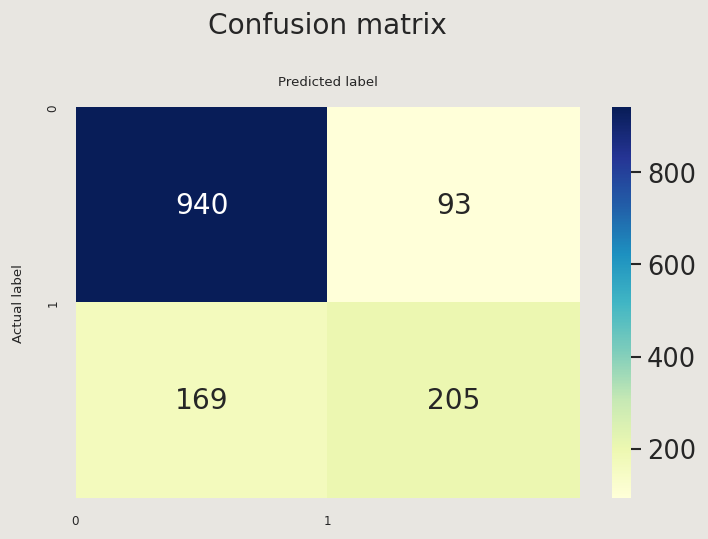

In [ ]:
# Validate final results with Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
print (cm)

# Confusion Matrix as a quick Crosstab:
pd.crosstab(y_test,pd.Series(y_pred), rownames=['ACTUAL'],colnames=['PRED'])

# visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu")
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % round(accuracy_score(y_test, y_pred)*100,2))
print("\n")

The Confusion matrix indicates that we have 205+940 correct predictions and 169+93 incorrect predictions. 

Accuracy rate = number of correct predictions/ total predictions * 100 

Error rate = Number of wrong predictions / total predictions * 100 

We have got an accuracy of 80%; signalling the characteristics of a reasonably good model.

Format Final Results

Unpredictability and risk are the close companions of any predictive models. Therefore in the real world, its always a good practice to build a propensity score besides an absolute predicted outcome. Instead of just retrieving a binary estimated target outcome (0 or 1), every ‘Customer ID’ could get an additional layer of propensity score highlighting their percentage of probability to take the target action.

In [ ]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"].round(2)
final_results = final_results[['customerID', 'Churn', 'predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))

In [ ]:
display(final_results.head(20))

,customerID,Churn,predictions,propensity_to_churn(%),Ranking
5134,8010-EZLOU,1,1,66.45,1
2428,2519-FAKOD,1,0,44.97,3
2503,9067-SQTNS,0,0,1.89,9
3119,5307-DZCVC,1,1,53.61,2
2534,8565-HBFNN,0,0,4.74,8
2433,8314-DPQHL,0,0,15.34,6
5097,8547-NSBBO,0,0,21.64,5
4437,3716-LRGXK,0,0,8.62,7
1988,3424-NMNBO,1,0,20.31,5
1423,0680-DFNNY,1,1,74.37,1
